# Prepare a prediction model for profit of 50_startups data.

## Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years  
Administration -- spend on administration in the past few years  
Marketing Spend -- spend on Marketing in the past few years  
State -- states from which data is collected  
Profit  -- profit of each state in the past few years

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [73]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


No null values. There are some 0's but they are under R&D and Marketing which is plausible. If there were 0's in Admin spending, we could've infered that 0 was an alias for missing data

In [74]:
df.rename(columns = {'R&D Spend':'R&D', 'Marketing Spend': 'Marketing'}, inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


State is categorical

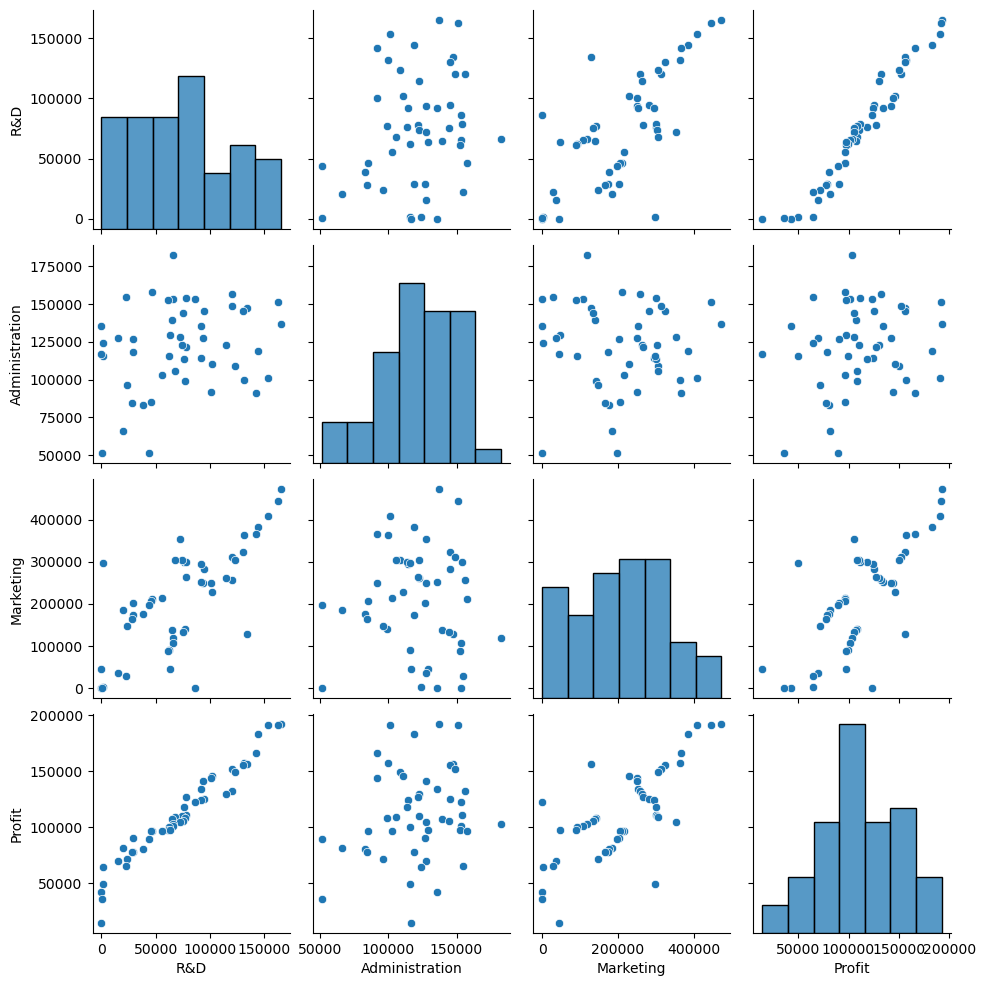

In [76]:
sns.pairplot(df)

R&D is highly correlated with Profit

In [77]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [78]:
df = pd.get_dummies(df, columns = ['State'])

<Axes: >

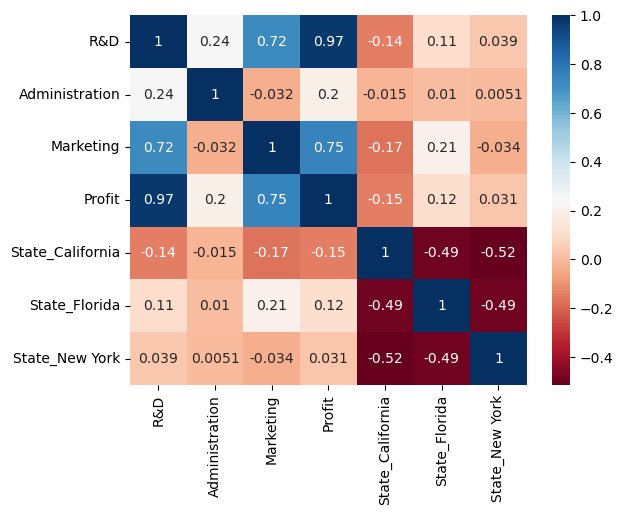

In [79]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu')

With Profit, R&D is highly correlated, Administration is barely correlated, Marketing is somewhat correlated

In [80]:
model = LinearRegression()

In [81]:
x = df.drop(columns = 'Profit')
y = df.Profit

In [82]:
model.fit(x,y)

LinearRegression()

In [83]:
model.score(x,y)

0.9507524843355148

This is a very good score

In [84]:
r2_score_chart = {}

In [85]:
r2_score_chart['x'] = model.score(x,y)

In [86]:
x_without_RnD = x.drop(columns = 'R&D')

dropping R&D from x as R&D and Marketing are moderately correlated. We expect to get a smaller score by removing R&D as it is highly correlated with the dependent variable

In [87]:
model.fit(x_without_RnD, y)

LinearRegression()

In [88]:
model.score(x_without_RnD, y)

0.6131075019799208

This is a very bad score

In [89]:
r2_score_chart['x_without_RnD'] = model.score(x_without_RnD,y)

In [90]:
x_without_Marketing = x.drop(columns = 'Marketing')

In [91]:
model.fit(x_without_Marketing, y)

LinearRegression()

In [92]:
model.score(x_without_Marketing, y)

0.9479799298023537

Still not as good of a score as the model with all features

In [93]:
r2_score_chart['x_without_Marketing'] = model.score(x_without_Marketing,y)

In [94]:
x_without_stateInfo = x.drop(columns = ['State_California', 'State_Florida', 'State_New York'])

In [95]:
model.fit(x_without_stateInfo, y)

LinearRegression()

In [96]:
model.score(x_without_stateInfo, y)

0.9507459940683246

This model is 0.001% worse than the original one

In [97]:
r2_score_chart['x_without_stateInfo'] = model.score(x_without_stateInfo,y)

In [99]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [100]:
normalizer = Normalizer()

In [101]:
x_norm = normalizer.fit_transform(x)

In [102]:
model.fit(x_norm, y)

LinearRegression()

In [103]:
model.score(x_norm, y)

0.839899107322941

Normalizing the independent variables, reduced the score

In [104]:
r2_score_chart['x_Normalized'] = model.score(x_norm, y)

In [105]:
standardizer = StandardScaler()

In [106]:
x_std = standardizer.fit_transform(x)

In [107]:
model.fit(x_std, y)

LinearRegression()

In [108]:
model.score(x_std, y)

0.9507524843355148

Standardizing the data gave the same score as the original data/model

In [110]:
r2_score_chart['x_Standardized'] = model.score(x_std, y)

In [112]:
pd.Series(r2_score_chart)

x                      0.950752
x_without_RnD          0.613108
x_without_Marketing    0.947980
x_without_stateInfo    0.950746
x_Normalized           0.839899
x_Standardized         0.950752
dtype: float64

# The original data with one hot encoding for categorical values gave the best R Squared value of 95%